In [2]:
# Importer les librairies
# Calcul, manipulation et visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importer le dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
#Rapide résumé du dataframe: nombre de colonnes et nombre de lignes
dataset.shape

(200, 5)

In [4]:
# Connaitre le nom des colonnes
dataset.columns

list(dataset.columns.values)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [5]:
# Visualiser les premières lignes
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Visualiser les premières lignes
dataset.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# Type des colonnes
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
dataset_qual=dataset.select_dtypes(exclude=['object'])
dataset_qual.drop('CustomerID', axis=1, inplace=True)
dataset_qual.describe()

C:\Users\aleleannec\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# removing null values to avoid errors  
dataset.dropna(inplace = True)  

In [10]:
# percentile list 
perc =[.20, .40, .60, .80] 

# list of dtypes to include 
include =['object', 'float', 'int64'] 

In [11]:
# calling describe method 
desc = dataset.describe(percentiles = perc, include = include) 

In [14]:
desc

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
20%,40.800000,NaN,26.800000,37.800000,26.000000
40%,80.600000,NaN,32.000000,54.000000,45.600000
50%,100.500000,NaN,36.000000,61.500000,50.000000


In [27]:
# graphiques
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
%matplotlib inline


In [28]:
# Dummification et imputatation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split #Partitionnement de la dataset
from sklearn.preprocessing import Imputer #Pour l'imputation des valeurs manquante
#Pas de message d'alertes
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None #masque les avertissements de pandas 

Text(0.5, 1.0, 'Statistiques générales des variables ')

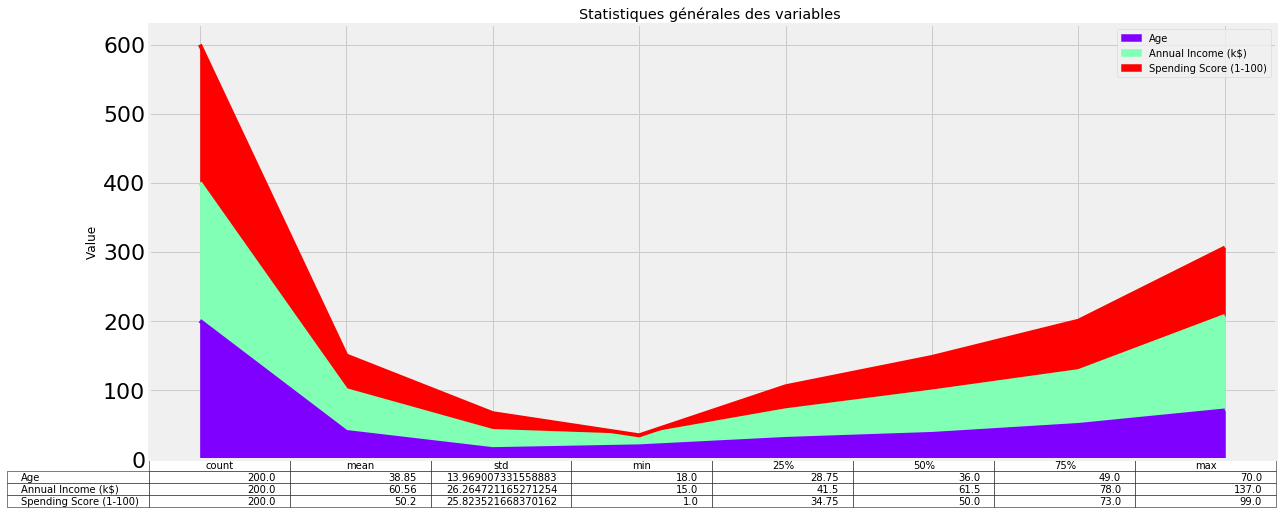

In [30]:
dataset_qual=dataset.select_dtypes(exclude=['object'])
dataset_qual.drop('CustomerID', axis=1, inplace=True)
dataset_qual.describe().plot(kind = "area",fontsize=22, figsize = (18,8), table = True,colormap="rainbow")
plt.xlabel('',)
plt.ylabel('Value')
plt.title("Statistiques générales des variables ")

In [31]:
#Verifier les valeurs manquantes
vars_with_missing = []
for f in dataset.columns:
    missings = dataset[dataset[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/dataset.shape[0]

        print('La Variable {} a enregistré {} ({:.2%}) valeurs manquantes'.format(f, missings, missings_perc))

print('En total, il a {} variables avec des valeurs manquantes'.format(len(vars_with_missing)))


En total, il a 0 variables avec des valeurs manquantes


In [32]:
# description d'une variable qualitative
dataset['Genre'].describe(), dataset['Genre'].head()

(count        200
 unique         2
 top       Female
 freq         112
 Name: Genre, dtype: object, 0      Male
 1      Male
 2    Female
 3    Female
 4    Female
 Name: Genre, dtype: object)

In [33]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


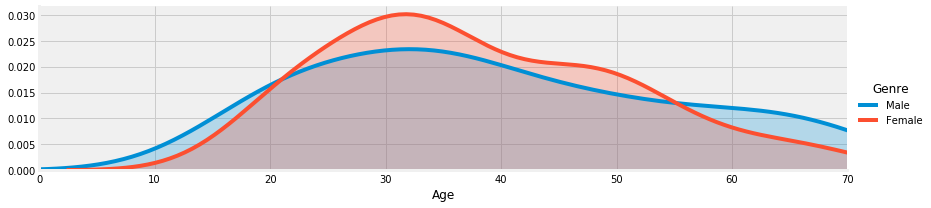

In [34]:
# Visualiser des données : graphe Genre * Sexe
a = sns.FacetGrid( dataset, hue = 'Genre', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , dataset['Age'].max()))
a.add_legend()

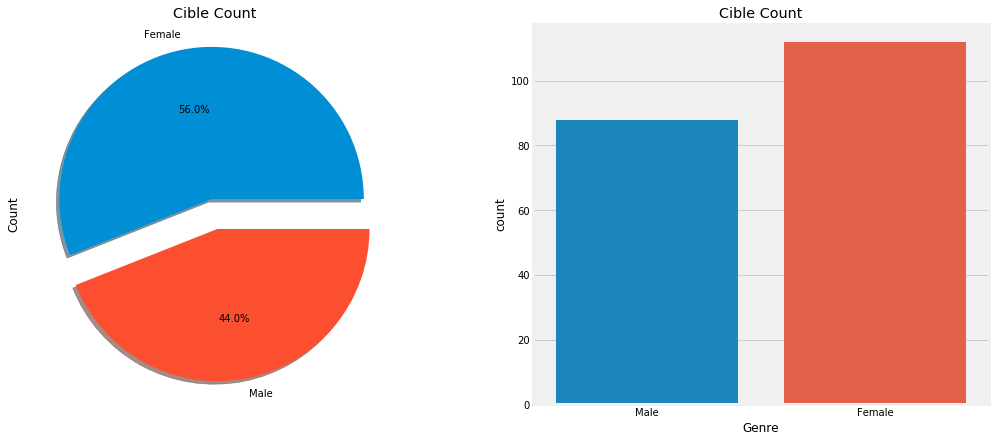

In [35]:
#Visualiser des graphes - librairie seaborn
f,ax=plt.subplots(1,2,figsize=(16,7))
dataset['Genre'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow =True)
ax[0].set_title('Cible Count')
ax[0].set_ylabel('Count')
sns.countplot('Genre',data=dataset,ax=ax[1])
ax[1].set_title('Cible Count')
plt.show()

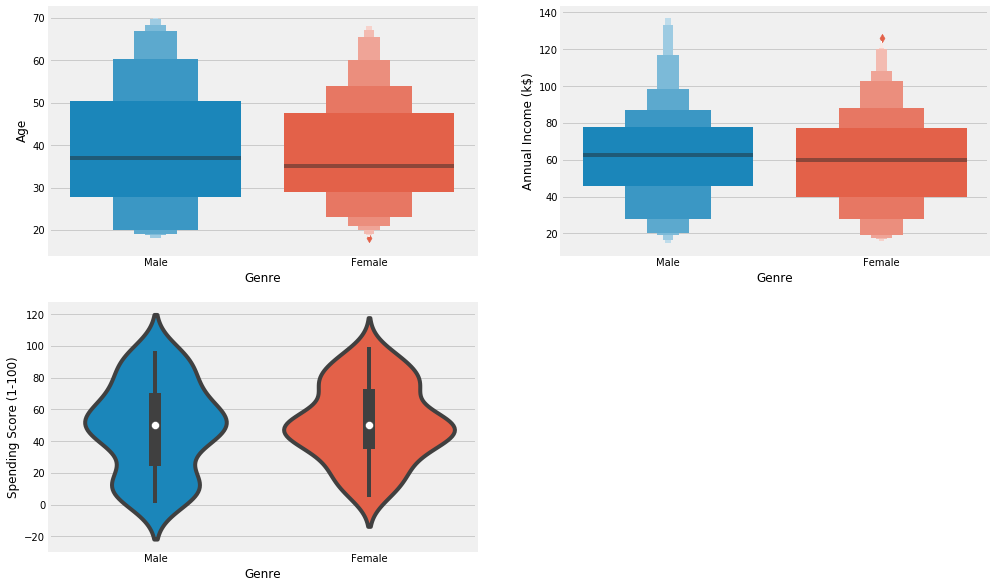

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxenplot(x='Genre',y='Age',data=dataset)
plt.subplot(2,2,2)
sns.boxenplot(x='Genre',y='Annual Income (k$)',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='Genre',y='Spending Score (1-100)',data=dataset)

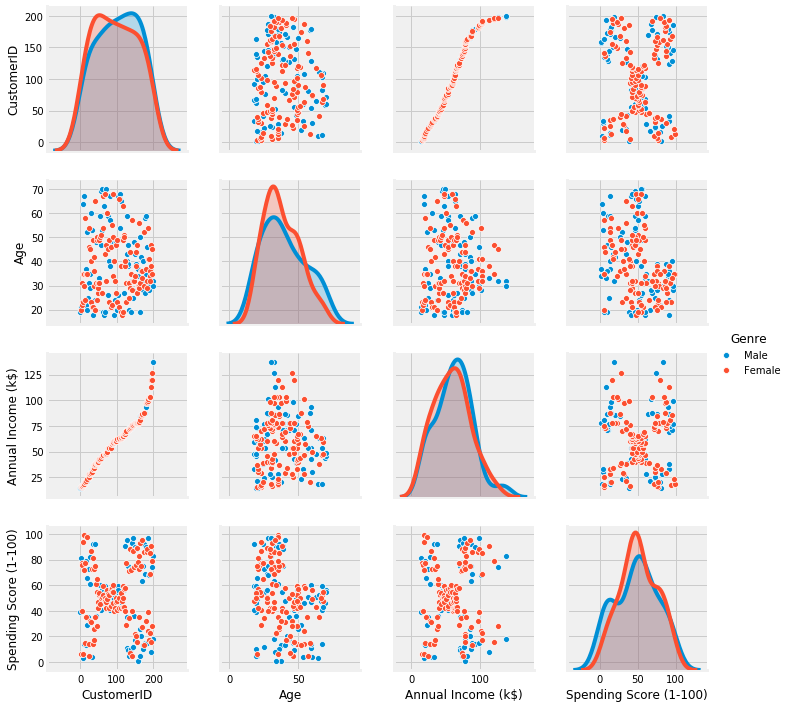

In [39]:
# Visualiser plusieurs types de représentations selon une variable cible
sns.pairplot(dataset,hue='Genre')

In [52]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


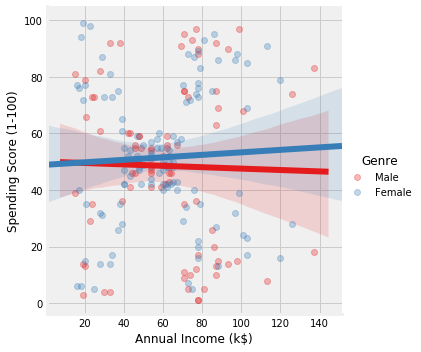

In [54]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, hue='Genre', palette='Set1', scatter_kws={'alpha':0.3}) 

In [15]:
# examiner une seule variable
print(dataset['Age'].unique())
print(dataset['Age'].value_counts(sort = True))
print(dataset['Age'].describe())

[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
